In [26]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np

In [17]:
train_path = 'speech-based-classification-layer-9/train.csv'
valid_path = 'speech-based-classification-layer-9/valid.csv'
test_path = 'speech-based-classification-layer-9/test.csv'
train = pd.read_csv(train_path)
valid = pd.read_csv(valid_path)
test = pd.read_csv(test_path)
original_train = train.copy()
original_valid = train.copy()
original_test = test.copy()

Data Imputing

In [18]:
train.isnull().sum()

feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_768      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 772, dtype: int64

Filling missing values with mean in train data set

In [19]:
mean_age = int(train['label_2'].mean())
train['label_2'].fillna(mean_age, inplace=True)
train['label_2'] = train['label_2'].astype(int)
train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,45,27,1,6
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,45,27,1,6
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45,27,1,6
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45,27,1,6
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,45,27,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,-0.041520,0.302638,0.004811,0.211441,-0.249326,-0.113395,-0.146776,-0.146222,-0.040344,-0.124016,...,0.290069,-0.223051,-0.053575,-0.230222,-0.451943,0.117817,39,29,1,6
28516,-0.056359,0.061850,0.051865,0.032107,-0.005930,-0.040313,0.117453,-0.067553,0.045004,0.035735,...,0.004518,0.035248,-0.047345,-0.006539,-0.025633,0.002474,39,29,1,6
28517,0.019361,0.148111,0.093434,0.011795,-0.074029,-0.077628,0.049933,-0.096354,0.138556,0.130414,...,0.014918,0.015676,-0.033608,0.068212,0.049871,-0.027607,39,29,1,6
28518,-0.043644,0.084073,0.074749,0.091776,-0.090782,-0.163187,-0.012568,-0.051021,0.038726,0.011009,...,-0.098420,0.113067,0.028218,0.036682,0.030056,-0.084346,39,29,1,6


In [20]:
valid.isnull().sum()

feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
               ..
feature_768     0
label_1         0
label_2        14
label_3         0
label_4         0
Length: 772, dtype: int64

Filling missing values with mean in valid dataset

In [21]:
mean_age = int(train['label_2'].mean())
valid['label_2'].fillna(mean_age, inplace=True)
valid['label_2'] = valid['label_2'].astype(int)
valid

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.130454,0.103857,0.130866,-0.036366,-0.152212,-0.072316,-0.041838,-0.019596,0.038727,0.022496,...,0.129246,0.018913,0.013387,-0.054259,0.006282,0.049646,45,27,1,6
1,0.019179,0.104888,0.079487,0.005187,-0.134111,-0.109271,0.054558,-0.083966,-0.000091,0.083015,...,-0.031823,0.061069,0.036411,0.101357,0.088504,0.008192,45,27,1,6
2,-0.028485,0.051889,0.033343,-0.029115,-0.091265,-0.038653,0.113460,-0.057983,0.128808,0.062455,...,-0.033106,-0.007366,-0.027673,0.052090,0.044097,0.054422,45,27,1,6
3,-0.078959,0.082325,0.068852,-0.028885,-0.146059,-0.071453,-0.028955,0.031253,0.034923,0.019338,...,0.164456,-0.025891,0.037993,0.012060,-0.044266,0.045405,45,27,1,6
4,0.001748,0.050968,-0.034524,0.074153,0.063857,-0.133338,0.102604,-0.031676,0.010629,-0.018684,...,-0.102749,0.022433,0.018421,0.086064,0.075351,-0.067089,45,27,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-0.015146,0.075347,-0.067940,0.018324,-0.009130,-0.078199,0.019046,0.054832,0.057062,-0.041307,...,-0.037656,0.014558,-0.006257,0.114661,-0.020831,0.043870,39,29,1,6
746,-0.093367,0.090779,-0.014720,0.060278,-0.054997,0.012507,0.138347,0.064434,0.021669,0.038423,...,-0.102469,-0.012509,-0.024472,-0.082420,-0.018768,-0.091912,39,29,1,6
747,0.036313,0.053569,-0.040507,0.084671,-0.047545,-0.127989,0.048077,0.038251,0.058703,0.012898,...,-0.139285,-0.020544,-0.086482,0.202496,-0.089369,-0.052960,39,29,1,6
748,0.002803,0.127188,0.091111,-0.024576,-0.044046,-0.065907,-0.019063,-0.062951,0.066077,0.058489,...,0.055279,-0.014534,0.014749,0.017866,-0.008768,-0.017424,39,29,1,6


In [ ]:
valid.isnull().sum()

Label 01

Separating features and label 01

In [43]:
train_features = train.iloc[:, :768]
train_label_1 = train.iloc[:, 768]

valid_features = valid.iloc[:, :768]
valid_label_1 = valid.iloc[:, 768]

test_features = test.iloc[:, :768]
test_label_1 = valid.iloc[:, 768]

In [41]:
threshold_array = [0.005, 0.01, 0.05, 0.1, 0.15]
remaining_features_count = []

for thresh in threshold_array:
    var_thres = VarianceThreshold(threshold=thresh)
    var_thres.fit(train_features)
    remaining_features_count.append(var_thres.get_support().sum())

print(remaining_features_count)

[184, 78, 14, 8, 2]


All most all the features has very low variances.

Feature selection based on mutual information

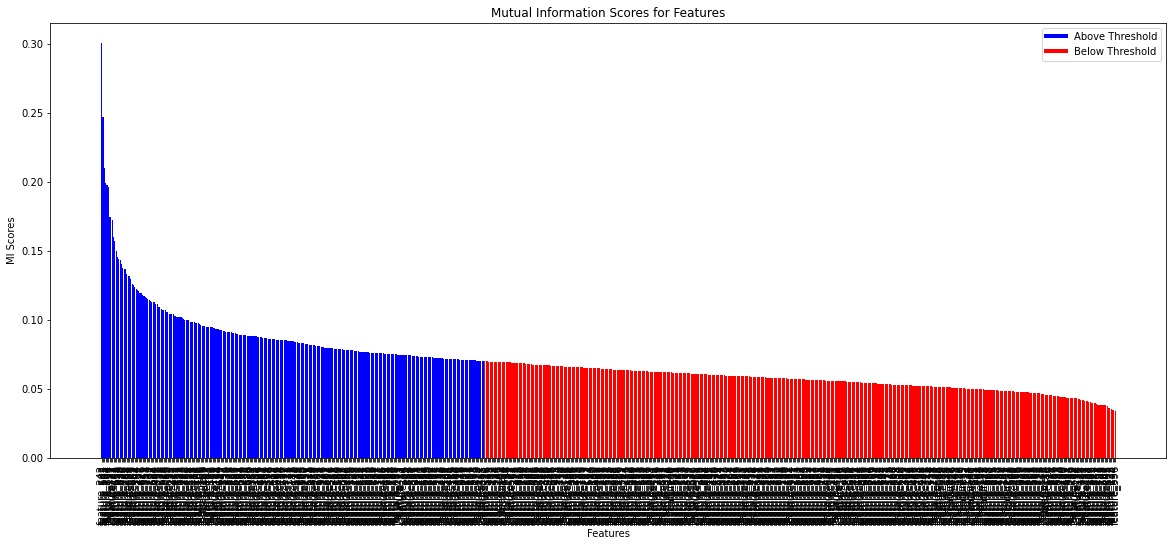

In [42]:
def plot_mi_scores(features, label, threshold):
    mi_scores = mutual_info_classif(features, label)
    colors = np.where(mi_scores > threshold, 'b', 'r')
    mi_df = pd.DataFrame({'Feature': features.columns, 'MI Score': mi_scores, 'Color': colors})
    mi_df = mi_df.sort_values(by='MI Score', ascending=False)
    plt.figure(figsize=(20, 8))
    bars = plt.bar(mi_df['Feature'], mi_df['MI Score'], color=mi_df['Color'])
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('MI Scores')
    plt.title('Mutual Information Scores for Features')
    plt.legend(handles=[plt.Line2D([0], [0], color='b', lw=4, label='Above Threshold'),
                        plt.Line2D([0], [0], color='r', lw=4, label='Below Threshold')])
    blue_feature_count = np.sum(mi_df['Color'] == 'b')
    
    plt.show()
    return blue_feature_count


feature_count = plot_mi_scores(train_features, train_label_1, threshold=0.07)


In [38]:
feature_count

290

In [47]:
def miClassification(train_input, train_output, valid_input, test_input, num_features_to_select):
    mi_scores = mutual_info_classif(train_input, train_output)
    mi_scores = pd.Series(mi_scores, index=train_input.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    selected_features_train = mi_scores[:num_features_to_select]
    new_train_input = train_input[selected_features_train.index]
    new_valid_input = valid_input[selected_features_train.index]
    new_test_input = test_input[selected_features_train.index]
    return mi_scores , new_train_input , new_valid_input ,new_test_input, selected_features_train

In [48]:
mi_scores , new_train_input , new_valid_input ,new_test_input, selected_features_train = miClassification(train_features, train_label_1, valid_features, test_features, feature_count)

In [49]:
new_train_input.shape

(28520, 290)

Random Forest

In [14]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
random_forest.fit(train_input, label_1_train_output)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
y_ped = random_forest.predict(valid.iloc[:, :768])
